# 2.3: Fundamentals of Visualization Libraries Part 1

## Imports & Settings

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [4]:
data = pd.read_parquet("2022_Citibike_Dataset.parquet", engine = "pyarrow")

In [5]:
df = data.assign(
    date = data["started_at"].dt.date,
    year = data["started_at"].dt.year
)

In [6]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source,avgTempCelsius,date,year
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,202201-citibike-tripdata_1,-6.0,2022-01-21,2022
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,202201-citibike-tripdata_1,1.6,2022-01-10,2022
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,202201-citibike-tripdata_1,-2.3,2022-01-26,2022
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,202201-citibike-tripdata_1,1.4,2022-01-03,2022
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,202201-citibike-tripdata_1,-5.9,2022-01-22,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838801,1F223EDAFF420AE3,electric_bike,2022-12-01 20:26:45.847,2022-12-01 20:30:46.012,Avenue D & E 3 St,5436.09,Stanton St & Chrystie St,5523.02,40.720701,-73.977939,40.722293,-73.991475,member,202212-citibike-tripdata_2,5.7,2022-12-01,2022
29838802,CFA5C560ACB73B8E,classic_bike,2022-12-26 13:46:34.237,2022-12-26 13:52:43.900,43 Ave & 47 St,6209.05,39 Ave & 45 St,6401.03,40.744806,-73.917290,40.749478,-73.918265,member,202212-citibike-tripdata_2,-4.7,2022-12-26,2022
29838803,11C8C5E0DB947B07,classic_bike,2022-12-01 05:56:14.903,2022-12-01 06:06:10.357,Avenue D & E 3 St,5436.09,Bleecker St & Crosby St,5679.08,40.720828,-73.977932,40.726156,-73.995102,member,202212-citibike-tripdata_2,5.7,2022-12-01,2022
29838804,5B9B083C534A5964,classic_bike,2022-12-02 11:54:15.871,2022-12-02 12:01:00.747,Montague St & Clinton St,4677.06,Sands St & Jay St,4821.03,40.694271,-73.992327,40.700119,-73.986200,member,202212-citibike-tripdata_2,3.4,2022-12-02,2022


## Temperature Line Plot

### Create Temperature Dataframe

In [9]:
# create temperature df
temp_df = \
(df
 .loc[:,["date","avgTempCelsius", "year"]]
 .drop_duplicates()
 .query("year == 2022")
 .drop(columns = ["year"])
 .set_index("date")
 .sort_index()
 .assign(rolling_temp = lambda df: df["avgTempCelsius"].rolling(window = 7, center = True).mean().round(1))
)

temp_df

,avgTempCelsius,rolling_temp
date,,
2022-01-01,11.6,NaN
2022-01-02,11.4,NaN
2022-01-03,1.4,NaN
2022-01-04,-2.7,4.4
2022-01-05,3.2,2.3
...,...,...
2022-12-27,-0.7,-0.7
2022-12-28,3.4,2.1
2022-12-29,6.4,NaN


### Plot Temperature

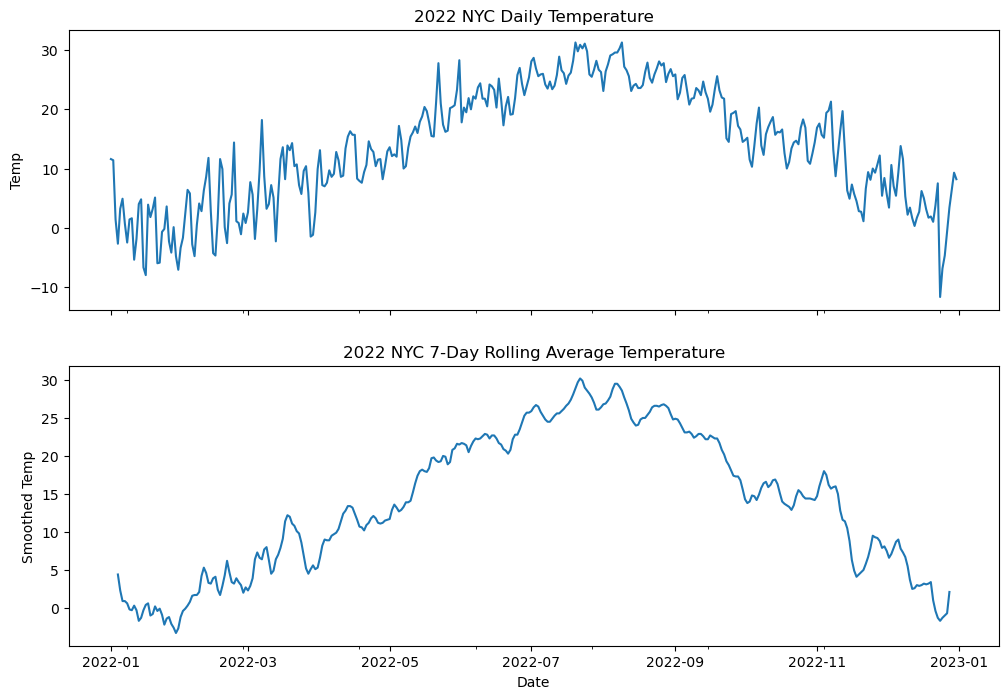

In [11]:
# create figure
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 8), sharex = True)

# plot daily temp
temp_df['avgTempCelsius'].plot(ax = axes[0], title = '2022 NYC Daily Temperature')
axes[0].set_ylabel('Temp')

# plot rolling average temp
temp_df['rolling_temp'].plot(ax = axes[1], title = '2022 NYC 7-Day Rolling Average Temperature')
axes[1].set_ylabel('Smoothed Temp')
axes[1].set_xlabel('Date')

plt.show()

## Trip Count Plot

### Create Trip Count Dataframe

In [14]:
trip_count_df = \
(df
 .loc[:,["date","ride_id","year"]]
 .query("year == 2022")
 .drop(columns = ["year"])
 .groupby(['date'])['ride_id'].count()
 .reset_index()
 .set_index("date")
 .rename(columns = {"ride_id": "ride_count"})
 .assign(ride_count_rolling = lambda x: x["ride_count"].rolling(window = 7, center = True).mean().round(0))
 .merge(temp_df, left_index = True, right_index = True)
)

trip_count_df

,ride_count,ride_count_rolling,avgTempCelsius,rolling_temp
date,,,,
2022-01-01,20428,NaN,11.6,NaN
2022-01-02,43009,NaN,11.4,NaN
2022-01-03,33189,NaN,1.4,NaN
2022-01-04,36842,32841.0,-2.7,4.4
2022-01-05,34230,33416.0,3.2,2.3
...,...,...,...,...
2022-12-27,33044,32996.0,-0.7,-0.7
2022-12-28,44027,35842.0,3.4,2.1
2022-12-29,51674,NaN,6.4,NaN


### Plot Trip Count

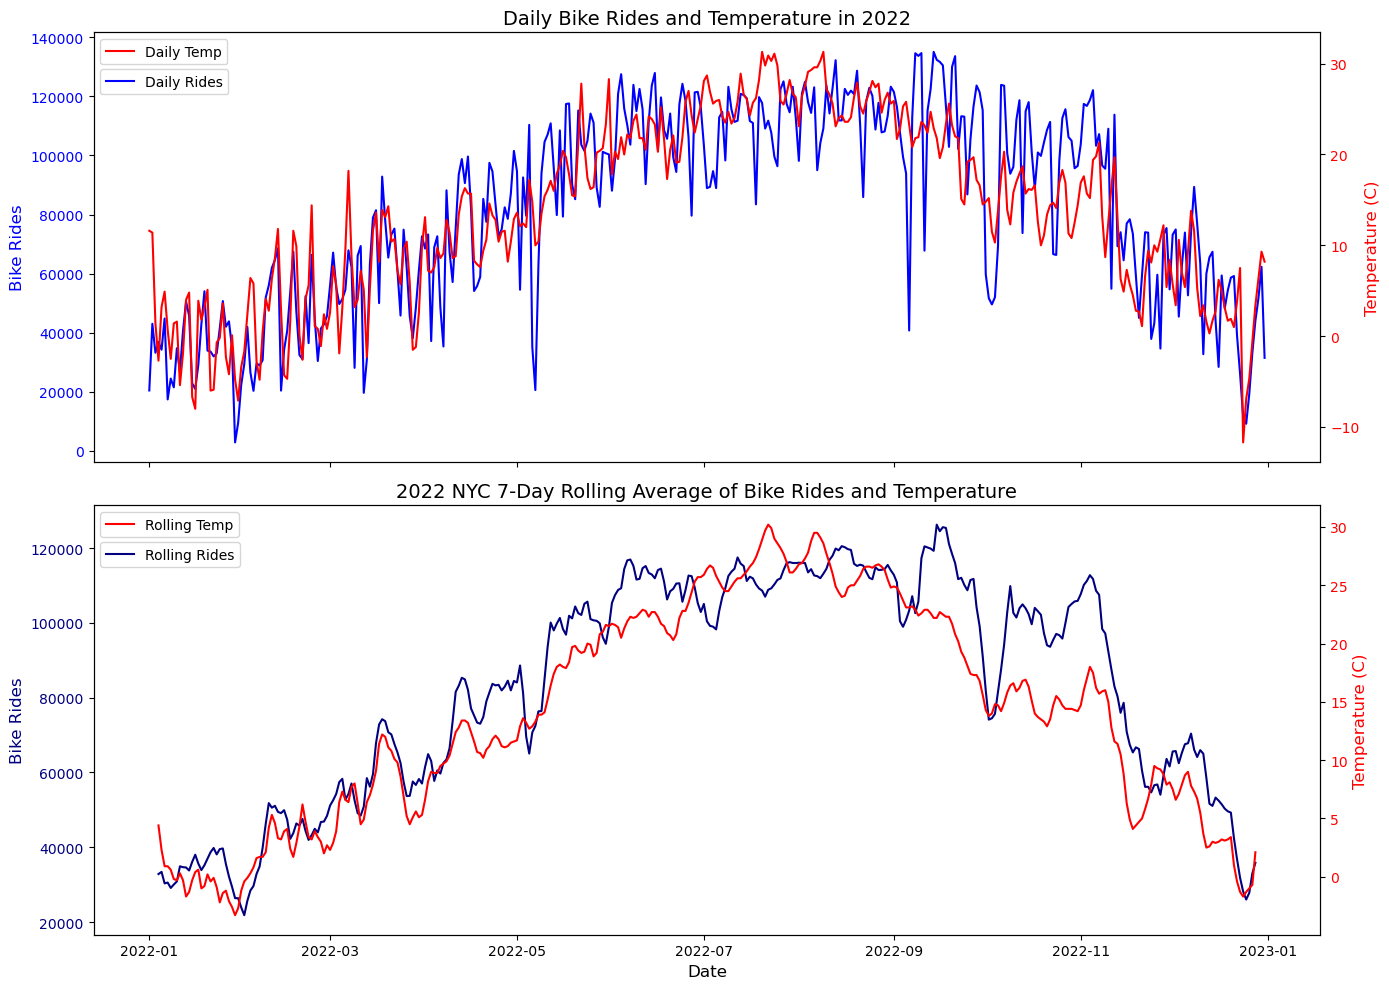

In [16]:
# figure w/ 2 subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 10), sharex = True)

# plot actual daily values
ax1 = axes[0]
ax1.plot(trip_count_df.index, trip_count_df["ride_count"], color = "blue", label = "Daily Rides")
ax1.set_ylabel("Bike Rides", color = "blue", fontsize = 12)
ax1.tick_params(axis = "y", labelcolor = "blue")

ax1b = ax1.twinx()
ax1b.plot(trip_count_df.index, trip_count_df["avgTempCelsius"], color = "red", label = "Daily Temp")
ax1b.set_ylabel("Temperature (C)", color = "red", fontsize = 12)
ax1b.tick_params(axis = "y", labelcolor = "red")
ax1b.legend(loc = "upper left") 

ax1.set_title("Daily Bike Rides and Temperature in 2022", fontsize = 14)
ax1.legend(loc = "upper left", bbox_to_anchor = (0, 1 - 0.07)) 

# plot 7 day rolling average
ax2 = axes[1]
ax2.plot(trip_count_df.index, trip_count_df["ride_count_rolling"], color = "navy", label = "Rolling Rides")
ax2.set_ylabel("Bike Rides", color = "navy", fontsize = 12)
ax2.tick_params(axis = "y", labelcolor = "navy")

ax2b = ax2.twinx()
ax2b.plot(trip_count_df.index, trip_count_df["rolling_temp"], color = "red", label = "Rolling Temp")
ax2b.set_ylabel("Temperature (C)", color = "red", fontsize = 12)
ax2b.tick_params(axis = "y", labelcolor = "red")
ax2b.legend(loc = "upper left") 

ax2.set_title("2022 NYC 7-Day Rolling Average of Bike Rides and Temperature", fontsize = 14)
ax2.set_xlabel("Date", fontsize = 12)
ax2.legend(loc = "upper left", bbox_to_anchor = (0, 1 - 0.07)) 

# adjust final figure
plt.tight_layout()
plt.show()


## Trip Duration Plot 

### Create Trip Duration Dataframe

In [19]:
trip_duration_df = \
(df
 .loc[:,["started_at", "ended_at"]]
 .assign(trip_duration = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round()
)

trip_duration_df

,started_at,ended_at,trip_duration
0,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,9.0
1,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,11.0
2,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,14.0
3,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,35.0
4,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,21.0
...,...,...,...
29838801,2022-12-01 20:26:45.847,2022-12-01 20:30:46.012,4.0
29838802,2022-12-26 13:46:34.237,2022-12-26 13:52:43.900,6.0
29838803,2022-12-01 05:56:14.903,2022-12-01 06:06:10.357,10.0
29838804,2022-12-02 11:54:15.871,2022-12-02 12:01:00.747,7.0


In [20]:
# filter out values < 0 (n = 357) as it doesn't make sense for a duration to be negative & < 120 to help reduce impact of outliers and improve visualization clarity
trip_duration_values = trip_duration_df[
    (trip_duration_df["trip_duration"] > 0) & 
    (trip_duration_df["trip_duration"] < 120)
]["trip_duration"]

#### Scratch work

In [22]:
trip_duration_values.value_counts().reset_index().sort_values(by = "trip_duration").head(50)

,trip_duration,count
22,1.0,375934
10,2.0,1116276
6,3.0,1569728
2,4.0,1851748
0,5.0,1963307
1,6.0,1943762
3,7.0,1849136
4,8.0,1716715
5,9.0,1571264
7,10.0,1427177


In [23]:
trip_duration_values.describe()

count    2.966791e+07
mean     1.400924e+01
std      1.288258e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.800000e+01
max      1.190000e+02
Name: trip_duration, dtype: float64

In [38]:
trip_duration_values.quantile(0.9)

29.0

In [39]:
(trip_duration_values > 120).mean() * 100

0.0

### Plot Trip Duration

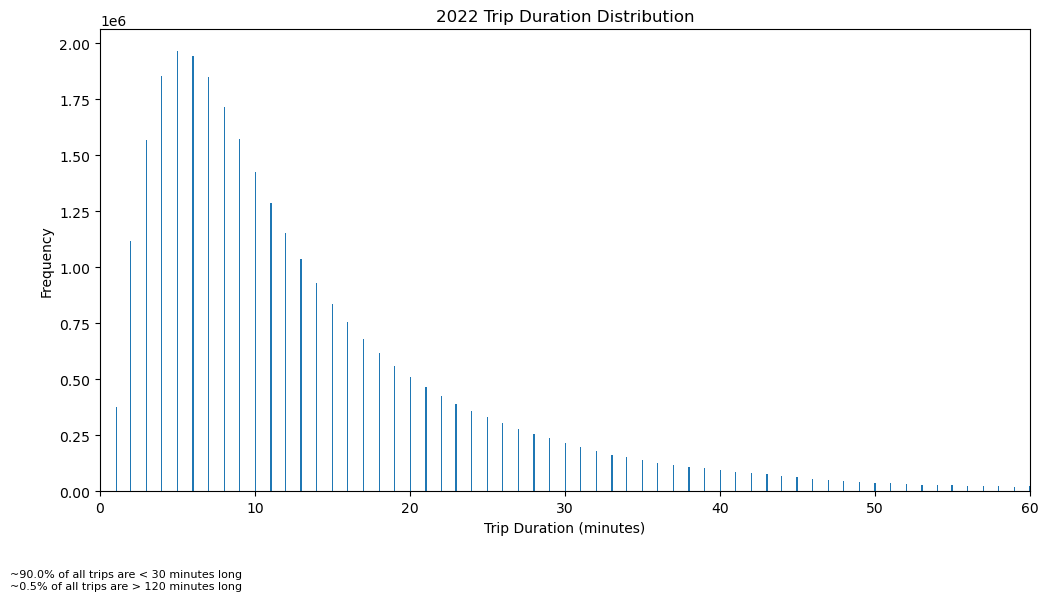

In [41]:
plt.figure(figsize = (12,6))
plt.hist(trip_duration_values, bins = "fd") # fd = Freedman-Diaconis binning rule, best for large & skewed dataset
plt.title("2022 Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)  # limit x-axis to focus on bulk of data

plt.figtext(0.05, -0.05,
                        '~90.0% of all trips are < 30 minutes long \n'
                        '~0.5% of all trips are > 120 minutes long',
            wrap = True, ha = "left", fontsize = 8)

plt.show()

## Rideable Type & Member/Casual Plot

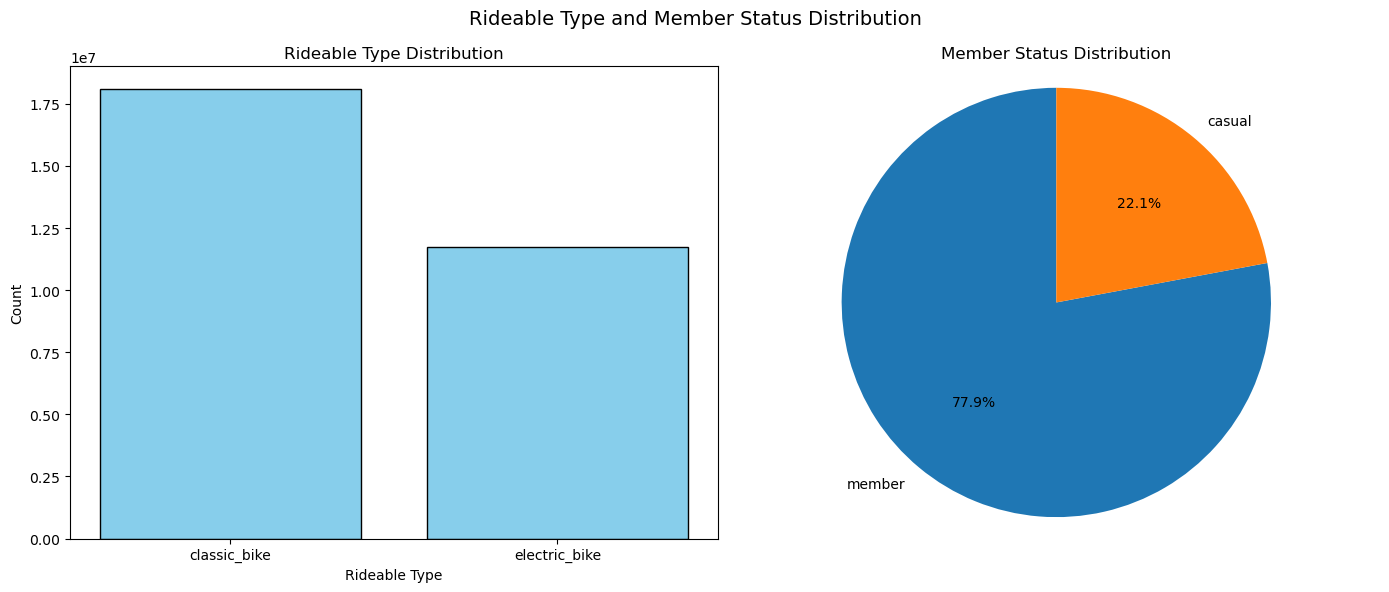

In [43]:
# main figure w/ 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

# rideable_type bar chart
rideable_type_counts = df["rideable_type"].value_counts()
ax1.bar(rideable_type_counts.index, rideable_type_counts.values, color = "skyblue", edgecolor = "black")
ax1.set_title("Rideable Type Distribution")
ax1.set_ylabel("Count")
ax1.set_xlabel("Rideable Type")

# member status pie chart
member_status_counts = df["member_casual"].value_counts()
ax2.pie(member_status_counts.values, labels = member_status_counts.index, autopct = "%1.1f%%", startangle = 90)
ax2.set_title("Member Status Distribution")
ax2.axis("equal")

# asjugst main figure
fig.suptitle("Rideable Type and Member Status Distribution", fontsize = 14)
plt.tight_layout()
plt.show()